# TIME SERIES

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [293]:
df =pd.read_csv("C:\\Users\\data2\\OneDrive\\Masaüstü\\codeware\\TASKS\\3task\\dataset.csv")
df.head(25)

,sID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
5,5,25-08-2012 05:00,2
6,6,25-08-2012 06:00,2
7,7,25-08-2012 07:00,2
8,8,25-08-2012 08:00,6
9,9,25-08-2012 09:00,2


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11856 entries, 0 to 11855
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sID       11856 non-null  int64 
 1   Datetime  11856 non-null  object
 2   Count     11856 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 278.0+ KB


In [295]:
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11856 entries, 0 to 11855
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   sID       11856 non-null  int64         
 1   Datetime  11856 non-null  datetime64[ns]
 2   Count     11856 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 278.0 KB


C:\Users\data2\AppData\Local\Temp\ipykernel_13400\1842396944.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Datetime"] = pd.to_datetime(df["Datetime"])


In [296]:
df =df.set_index("Datetime")
df.head(25)

,sID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2
2012-08-25 05:00:00,5,2
2012-08-25 06:00:00,6,2
2012-08-25 07:00:00,7,2
2012-08-25 08:00:00,8,6


In [297]:
df = df.resample('D').sum()

# 3.GOREV

In [298]:
train = df["Count"].iloc[:-30]
test =df["Count"].iloc[-30:]

last_value=train.iloc[:-1]

# - ELLE YAPILMIS ALGORITMALAR

In [299]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.model_selection import train_test_split

## NAIVE APPROACH

In [300]:
## Naive approach
def naive(train, test):
    last_value = train.iloc[-1] 
    return np.repeat(last_value, len(test)) 

## SA


In [133]:
def sa(sa):
    sa_avg=sa.mean()
    return np.repeat(sa_avg,len(sa))

In [134]:
sa_train=sa(train)
sa_test=sa(test)

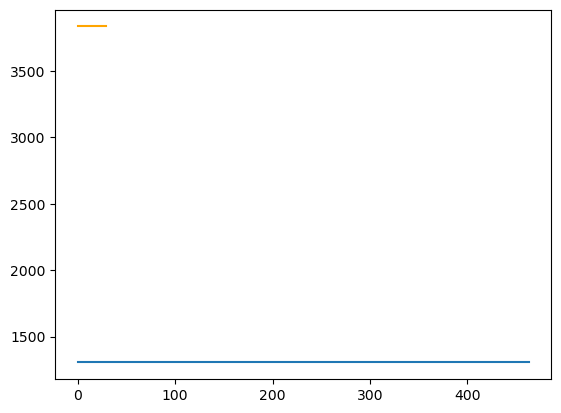

In [137]:
## birbirinden bagimsiz degerler
plt.plot(sa_train)
plt.plot(sa_test,color="orange")

##### BURADA 5- 5 windowluk avg kaydiriyoruz ama en sonunda -1 iloc olani alip test verisine isliyoruz bu normal mi ?

## SMA

In [119]:
def sma(sma,window):
    return sma.rolling(window=window).mean()
    

In [121]:
sma_train = sma(train,5)
sma_test = sma(test,5)

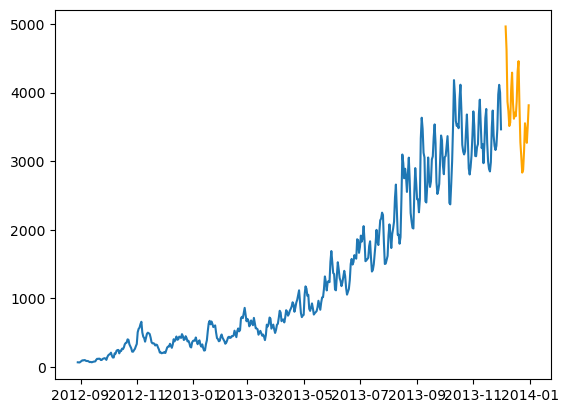

In [125]:
plt.plot(sma_train)
plt.plot(sma_test , color="orange")

SMA = np.repeat(a,len(test))
SMA_TEST=

## WEIGHTED MOVING AVERAGE

#### agirliklari yakindan uzaga dogru 4,3,2,1 verecegim

In [161]:
weight=[1,2,3,4]
ws=pd.Series(weight)

np dot dot product yapar

In [162]:
def wma(ws,window):
    weights = np.arange(1, window+ 1)
    weighted_avg = ws.rolling(window=window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)
    return weighted_avg


In [163]:
wma_train=wma(train,5)
wma_test=wma(test,5)

In [164]:
def wsa_tahmin(x,window):
    pred=[]
    last_window=x[-window:]
    for _ in range(30):
        weighted_avg = np.dot(last_window, np.arange(1, window + 1)) / np.sum(np.arange(1, window + 1))
        pred.append(weighted_avg)
        last_window = np.append(last_window[1:], weighted_avg)
    return pred
    


In [165]:
wsa_predict=wsa_tahmin(wma_train,5)

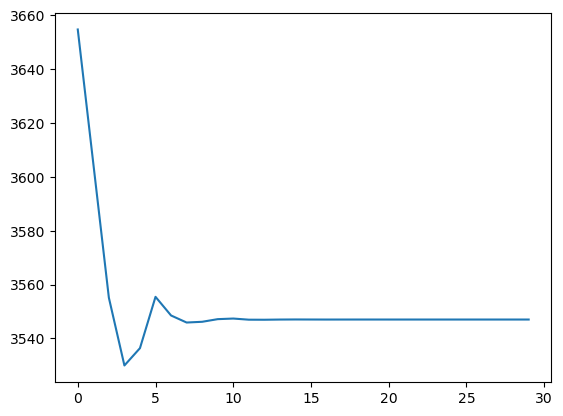

In [170]:
plt.plot(wsa_predict)


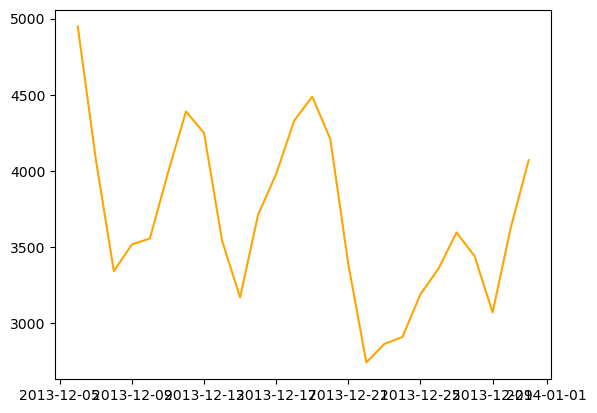

In [172]:
plt.plot(wma_test,color="orange")

## TARGET ILE PREDICT ARASINDAKI FARKA BAKACAGIZ (ACCURACY)


# WSA PREDICT

In [228]:
y_target_wsa = test.values
y_pred_wsa = np.array(wsa_predict)

In [229]:
mae = mean_absolute_error(y_target_wsa, y_pred_wsa)
mse = mean_squared_error(y_target_wsa, y_pred_wsa)
rmse=np.sqrt(mse)
mape = np.mean(np.abs((y_target_wsa - y_pred_wsa) / y_target_wsa)) * 100

In [230]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

MAE: 952.5718475577684
MSE: 1270993.1811760059
RMSE: 1127.383333731702
MAPE: 27.560145277569536


# SMA PREDICT

In [253]:
y_target_sma = test.values
y_pred_sma = sma_test.values

In [254]:
veriler = pd.DataFrame({'y_target': y_target_sma, 'y_pred': y_pred_sma})

#### nan degerleri temizlemek icin dropna , dropna icin dataframe cevirdik

In [255]:
veriler.dropna(inplace=True)
veriler.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 4 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   y_target  26 non-null     int64  
 1   y_pred    26 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 624.0 bytes


In [256]:
veriler.head()

,y_target,y_pred
4,4558,4962.4
5,2344,4622.8
6,2414,3868.4
7,4394,3731.6
8,3850,3512.0


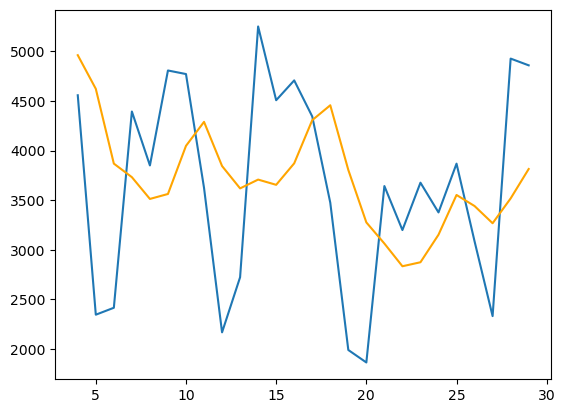

In [258]:
plt.plot(veriler["y_target"])
plt.plot(veriler["y_pred"],color="orange")

In [241]:
y_target_sma = veriler["y_target"]
y_pred_sma = veriler["y_pred"]

In [245]:
mae = mean_absolute_error(y_target_sma, y_pred_sma)
mse = mean_squared_error(y_target_sma, y_pred_sma)
rmse=np.sqrt(mse)
mape = np.mean(np.abs((y_target_sma - y_pred_sma) / y_target_sma)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

MAE: 918.1846153846153
MSE: 1138383.8030769231
RMSE: 1066.9507032084111
MAPE: 30.32847740061595


##values komutu verileri numpyarraya cevirir

# SA PREDICT

In [274]:
y_target_sa =test
y_pred_sa =sa_test
## zaten numpy array oldugu icin .values yazmaya gerek yok


In [276]:
veriler = pd.DataFrame({
    "y_target":y_target_sa,
    "y_pred": y_pred_sa
})

In [279]:
veriler = veriler.dropna()

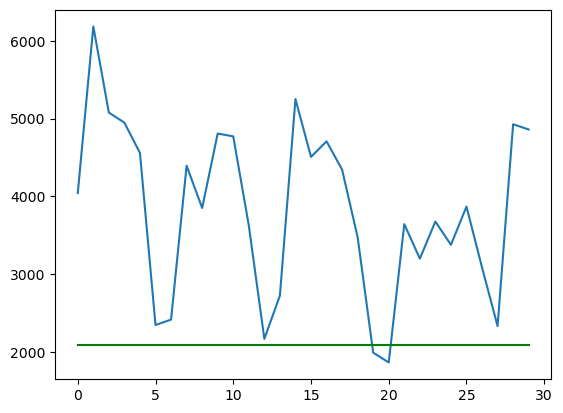

In [311]:
plt.plot(veriler["y_target"])
plt.plot(veriler["y_pred"],color="green")

# NAIVE APPROACH

In [303]:
y_target_naive =test.values
y_pred_naive = naive(train,test)

In [304]:
veriler =pd.DataFrame({
    "y_target": y_target_naive,
    "y_pred": y_pred_naive
})

In [307]:
veriler = veriler.dropna()

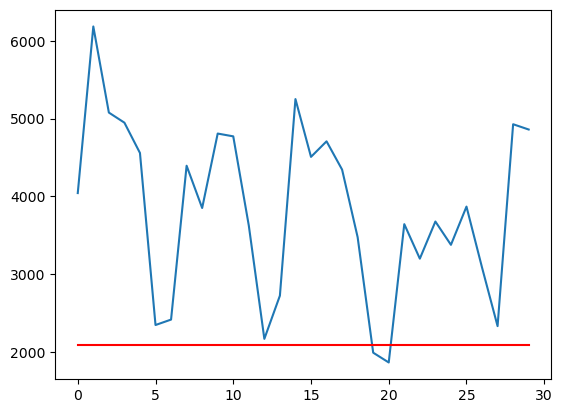

In [310]:
plt.plot(veriler["y_target"])
plt.plot(veriler["y_pred"],color="red")

In [309]:
mae = mean_absolute_error(y_target_naive, y_pred_naive)
mse = mean_squared_error(y_target_naive, y_pred_naive)
rmse=np.sqrt(mse)
mape = np.mean(np.abs((y_target_naive - y_pred_naive) / y_target_naive)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

MAE: 1763.7333333333333
MSE: 4232571.466666667
RMSE: 2057.321430080061
MAPE: 40.94253648802533


# HAZIR ALGORITMALAR (STATSMODELS KUTUPHANESI)

In [339]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

## simple exp smoothing (sadece level)

In [312]:
SES = SimpleExpSmoothing(train)

In [321]:
ses_model=SES.fit()
y_pred=ses_model.forecast(steps=30)
y_target=test.values

In [322]:
mae =mean_absolute_error(y_target,y_pred)

In [325]:
mse = mean_squared_error(y_target,y_pred)
rmse=np.sqrt(mse)
mape = np.mean(np.abs((y_target - y_pred) / y_target)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

MAE: 1018.0143425900147
MSE: 1429787.9852548155
RMSE: 1195.737423205787
MAPE: 27.871265062937013


In [328]:
veriler =pd.DataFrame({
    "y_target" : y_target,
    "y_pred" : y_pred
})

In [330]:
veriler= veriler.dropna()

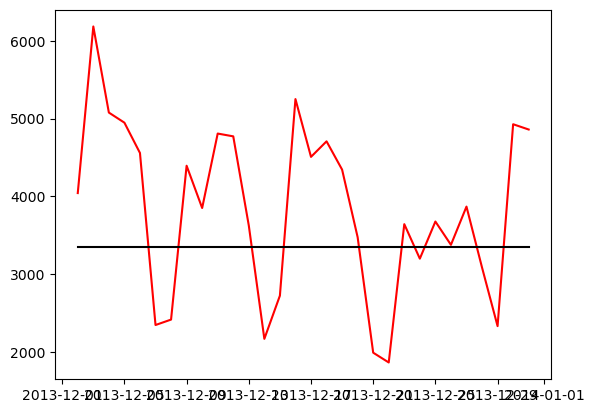

In [335]:
plt.plot(veriler["y_target"],color="red")
plt.plot(veriler["y_pred"],color="black")

## double exp smoothing (level ve trend analizi)

In [351]:
DES =ExponentialSmoothing(train,trend="add")

In [352]:
des_model = DES.fit()

In [353]:
y_pred = des_model.forecast(steps=30)
y_target=test.values

In [354]:
mae =mean_absolute_error(y_target,y_pred)
mse = mean_squared_error(y_target,y_pred)
rmse=np.sqrt(mse)
mape = np.mean(np.abs((y_target - y_pred) / y_target)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

MAE: 969.5258608703559
MSE: 1311677.5193328343
RMSE: 1145.284907493692
MAPE: 27.810492188572145


In [355]:
veriler =pd.DataFrame({
    "y_target" : y_target,
    "y_pred" : y_pred
})

In [356]:
veriler= veriler.dropna()

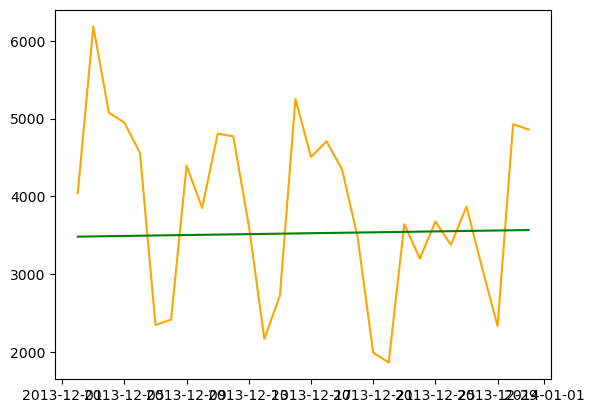

In [357]:
plt.plot(veriler["y_target"],color="orange")
plt.plot(veriler["y_pred"],color="green")

## Triple exp smoothing (trend ve seasonal)

In [363]:
TES=ExponentialSmoothing(train , trend="add",seasonal="add").fit()

In [364]:
y_target=test.values
y_pred=TES.forecast(steps=30)

In [365]:
mae =mean_absolute_error(y_target,y_pred)
mse = mean_squared_error(y_target,y_pred)
rmse=np.sqrt(mse)
mape = np.mean(np.abs((y_target - y_pred) / y_target)) * 100
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

MAE: 536.3879137736343
MSE: 477387.4132403905
RMSE: 690.932278331524
MAPE: 14.867704990264722


In [366]:
veriler =pd.DataFrame({
    "y_target" : y_target,
    "y_pred" : y_pred
})

In [367]:
veriler= veriler.dropna()

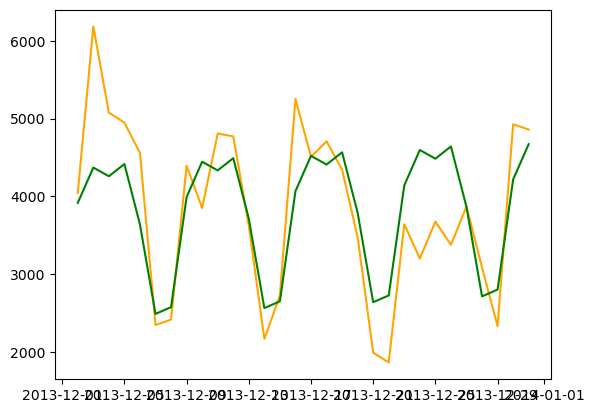

In [368]:
plt.plot(veriler["y_target"],color="orange")
plt.plot(veriler["y_pred"],color="green")

 triple exponential acik ara en uyumlu olan oldu

# basarisiz denemelerden bir kaci :))

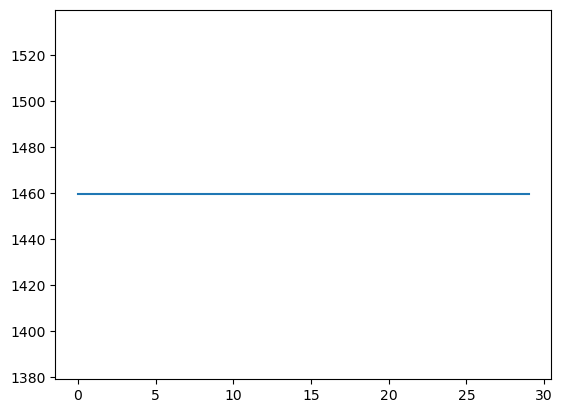

In [127]:
plt.plot(simp_avg)

In [178]:
type(test)

pandas.core.series.Series

## son 30 veri degistigi icin gozle gorunemiyor
plt.plot((naive_approach))

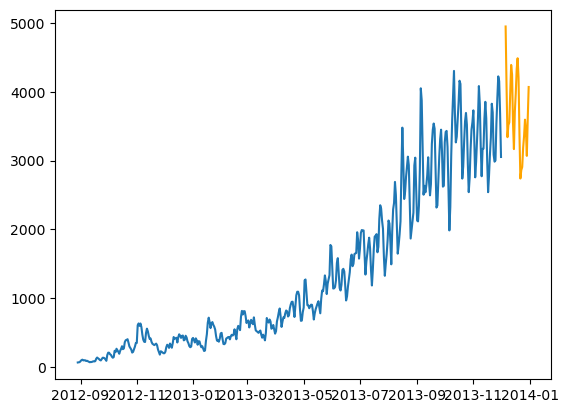

In [118]:
plt.plot(a)
plt.plot(b, color="orange")

SMA_5 =train.rolling(window=5).mean()
a =SMA_5.iloc[:-1]

dene = np.arange(2,6)

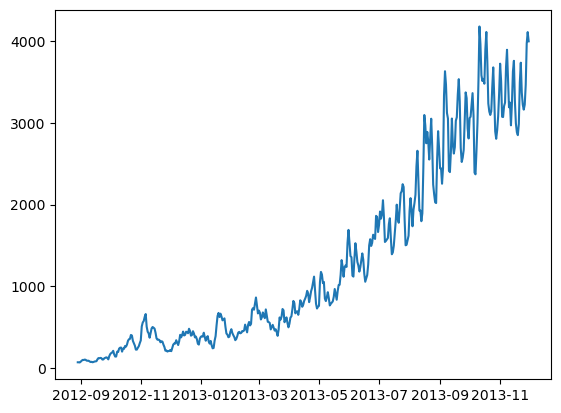

In [126]:
plt.plot(SMA)

train=df.iloc[:-30]
test =df.iloc[-30:]

cevap = np.dot(dene,w)/np.sum(weight)

X=df.index ,
y=df["Count"]

X_train ,X_test , y_train , y_test =train_test_split(X,y ,test_size=30 , shuffle=False)

naive_approach =X

X=np.array(X)
y=np.array(y)